### Vamos a practicar

Para esta practica vamos a usar un conjunto de datos de la revista *wine magazine*,
donde revisan una cantidad bastante sorprendente de vinos.

Una descripción de la base de datos la encuentras [aquí](https://www.kaggle.com/zynicide/wine-reviews).
Para no tener que descargar los datos a mano, se anexa la dirección `url` de donde se pueden descargar.

Es importante notr que la primer columna del archivo `csv` es el índice (usar `index_col=0` cuando se descargue el archivo con `pd.read_csv`).

Una vez descargado, usar pandas para las siguientes tareas:

1. ¿Cuantas variables tiene el dataframe? ¿Qué variables tienen valores perdidos? ¿Qué variables son numéricas? ¿Qué variables son cualitativas?
2. Hacer un dataframe con únicamente vinos europeos.
3. ¿Cuál es el menor, el mayor y el precio promedio de la botella por país? ¿De que país es la botella de menor precio?
4. ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
5. ¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
6. Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares.
7. ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
winmag_url = 'https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv'

dataFrame = pd.read_csv(winmag_url, index_col=0)

In [61]:
# ¿Cuantas variables tiene el dataframe?
print(f'El dataframe tiene {dataFrame.shape[1]} variables')

# ¿Qué variables tienen valores perdidos?
valPerdidos = dataFrame.columns[dataFrame.isnull().any()].tolist()
print(f'Las variables que tienen valores perdidos son: {valPerdidos}')


# ¿Qué variables son numéricas?
print(f'Las variables numéricas son: {dataFrame.select_dtypes(include="number").columns.tolist()}')

# ¿Qué variables son cualitativas?
print(f'Las variables cualitativas son: {dataFrame.select_dtypes(include="object").columns.tolist()}')


El dataframe tiene 13 variables
Las variables que tienen valores perdidos son: ['country', 'designation', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle']
Las variables numéricas son: ['points', 'price']
Las variables cualitativas son: ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [62]:

# Hacer un dataframe con únicamente vinos europeos.
dfEuropeo = dataFrame[dataFrame['country'].isin(['Italy', 'Spain', 'France', 'Portugal', 'Germany', 'Austria', 'Hungary', 'Greece', 'Romania', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg', 'Croatia', 'Georgia', 'England', 'Serbia', 'Moldova', 'Bulgaria', 'Cyprus','Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'  ])]
dfEuropeo



,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65486,France,"Closed up and firm with a hint of vanilla, hon...",Domaine Long-Depaquit Les Bougnons Premier Cru,90,NaN,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Albert Bichot 2005 Domaine Long-Depaquit Les B...,Chardonnay,Albert Bichot
65491,France,"A big, toasty wine, full of ripe, delicious fr...",Fourchaume Vieilles Vignes Premier Cru,90,36.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Pascal Bouchard 2006 Fourchaume Vieilles Vigne...,Chardonnay,Pascal Bouchard
65492,France,"A rounded, fruity wine, packed with yellow pea...",Mont-de-Milieu Premier Cru,90,30.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2005 Mont-de-Milieu Premier Cr...,Chardonnay,Simonnet-Febvre
65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre


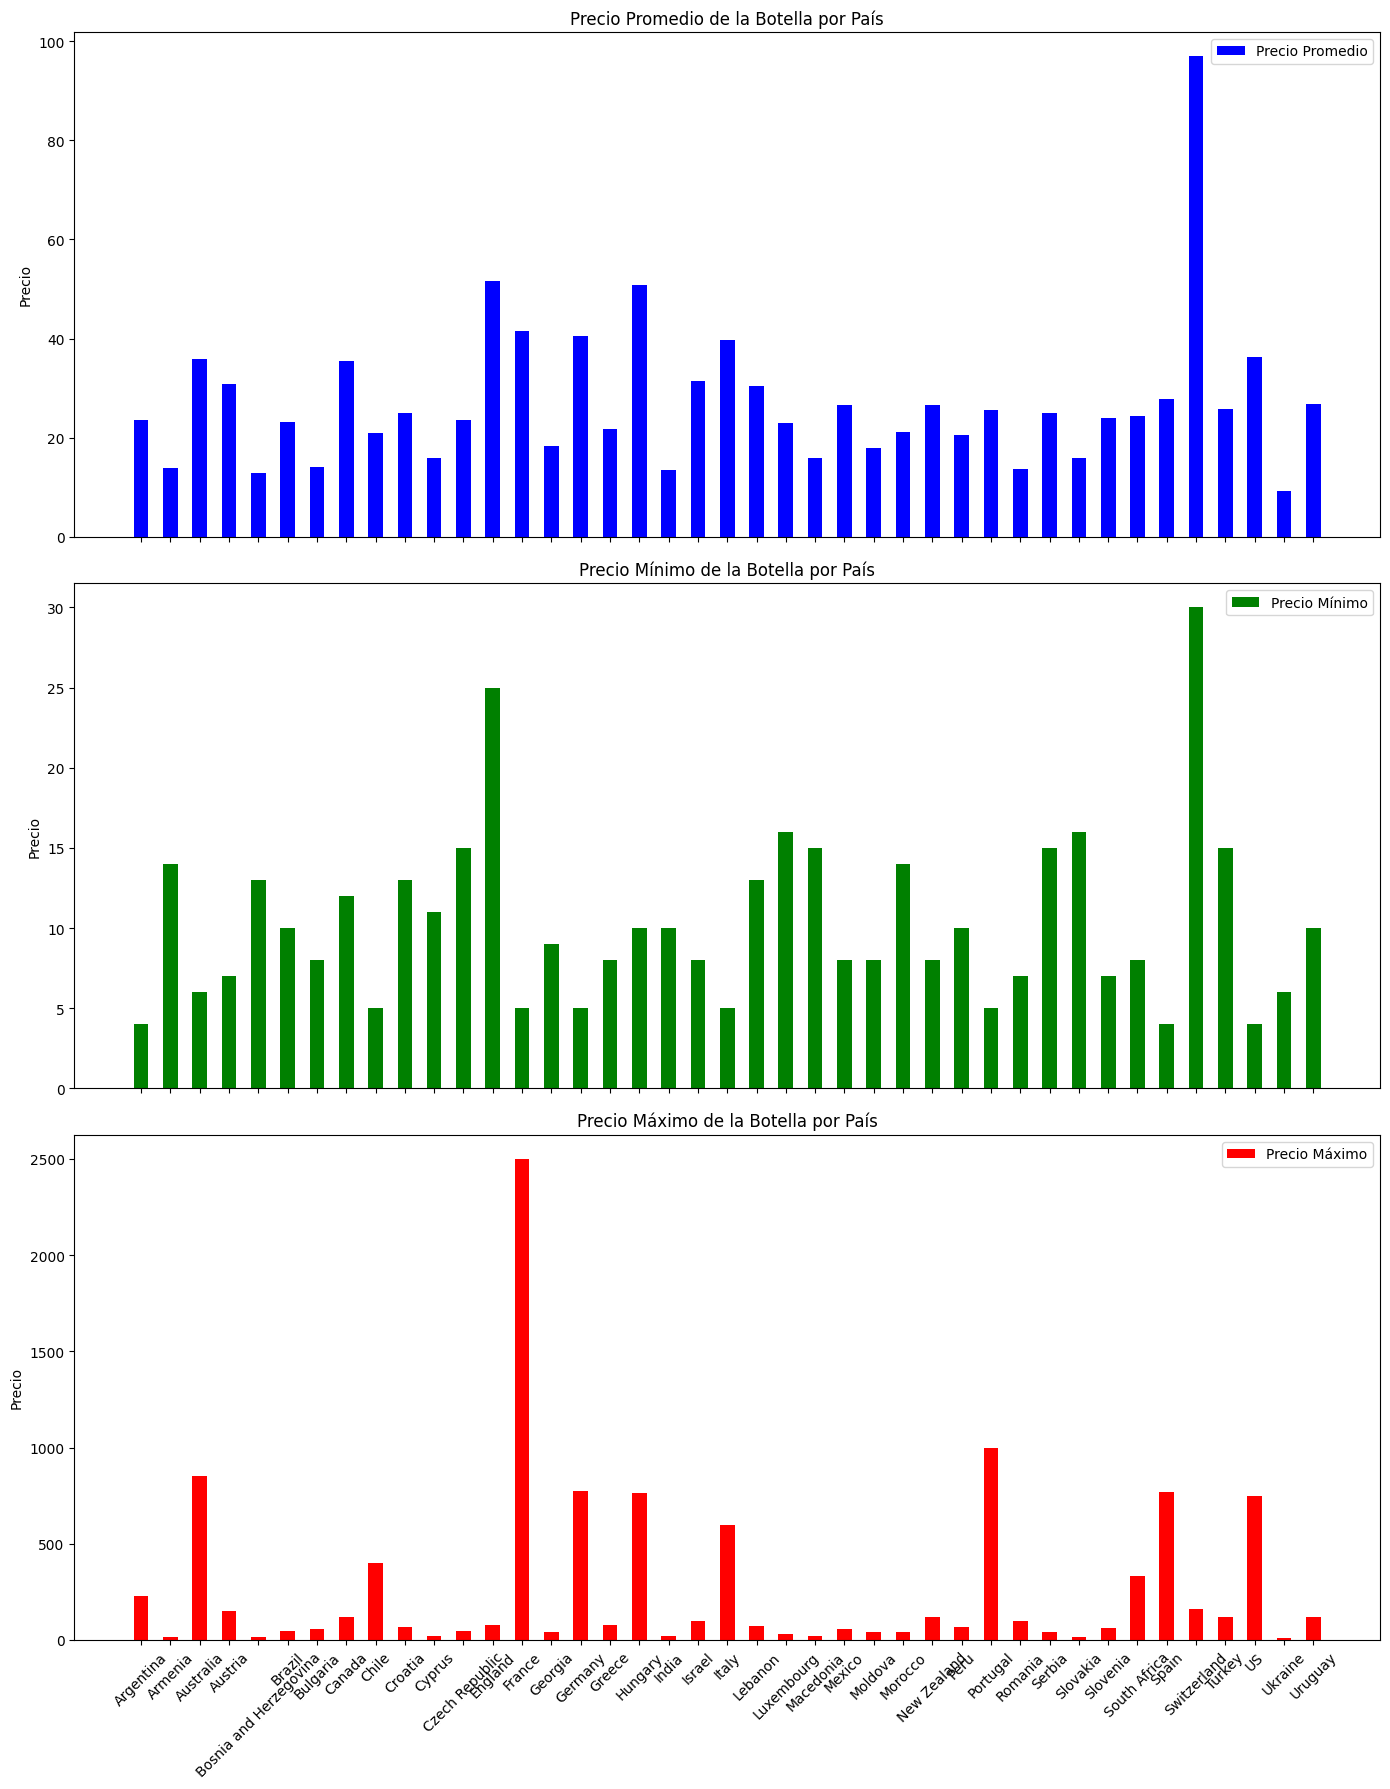

In [63]:
# ¿Cuál es el menor, el mayor y el precio promedio de la botella por país?

dfPrecioPais = dataFrame.groupby('country')['price'].agg(['min', 'max', 'mean'])
dfPrecioPais


#GRAFICAS
fig, axs = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

bar_width = 0.5
index = np.arange(len(dfPrecioPais.index))

axs[0].bar(index, dfPrecioPais['mean'], bar_width, color='b', label='Precio Promedio')
axs[0].set_title('Precio Promedio de la Botella por País')
axs[0].set_ylabel('Precio')
axs[0].set_xticks(index)
axs[0].set_xticklabels(dfPrecioPais.index, rotation=45)
axs[0].legend()

axs[1].bar(index, dfPrecioPais['min'], bar_width, color='g', label='Precio Mínimo')
axs[1].set_title('Precio Mínimo de la Botella por País')
axs[1].set_ylabel('Precio')
axs[1].set_xticks(index)
axs[1].set_xticklabels(dfPrecioPais.index, rotation=45)
axs[1].legend()

axs[2].bar(index, dfPrecioPais['max'], bar_width, color='r', label='Precio Máximo')
axs[2].set_title('Precio Máximo de la Botella por País')
axs[2].set_ylabel('Precio')
axs[2].set_xticks(index)
axs[2].set_xticklabels(dfPrecioPais.index, rotation=45)
axs[2].legend()

plt.tight_layout()

plt.show()

In [64]:
# ¿De que país es la botella de menor precio?

dfPrecioPais[dfPrecioPais['min'] == dfPrecioPais['min'].min()]

,min,max,mean
country,,,
Argentina,4.0,230.0,23.604663
Spain,4.0,770.0,27.875925
US,4.0,750.0,36.344889


In [65]:
# ¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?

aromaFresa = dataFrame[
    dataFrame['description'].str.contains('aroma', case=False, na=False) &
    dataFrame['description'].str.contains('strawberry', case=False, na=False)
]


aromaFresaCantidad = aromaFresa.shape[0]

print(f"Hay {aromaFresaCantidad} vinos con aroma a fresa.")



Hay 675 vinos con aroma a fresa.


Hay 24188 designaciones diferentes
Reserve
La designación 'Reserve' se repite 999 veces.


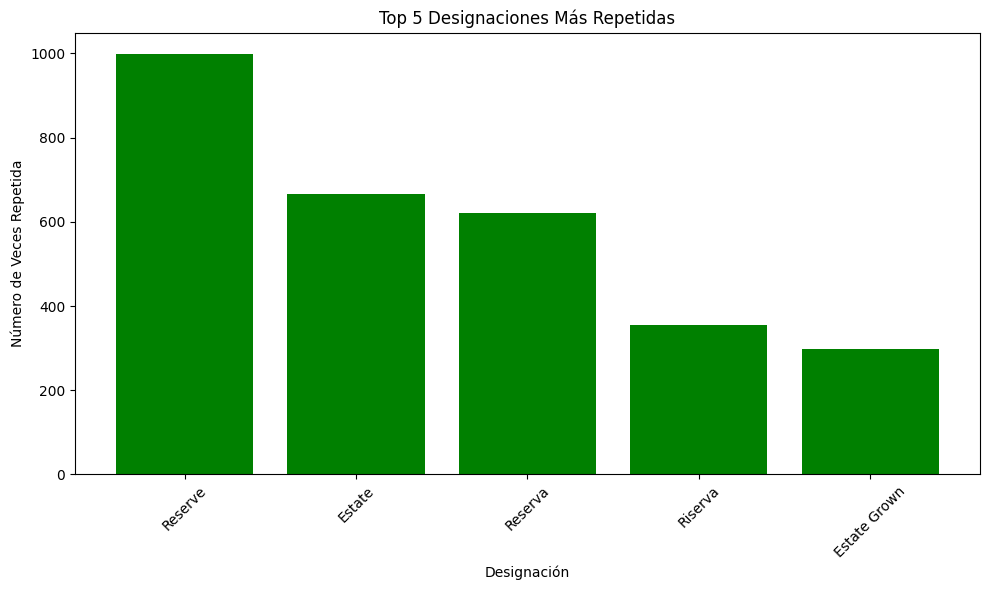

In [66]:
# ¿Cuantas designaciones diferentes hay?

designaciones = dataFrame['designation'].unique()
print(f'Hay {len(designaciones)} designaciones diferentes')

#¿Cuál es la más repetida?
designacion_mas_repetida = dataFrame['designation'].value_counts().idxmax()
print(designacion_mas_repetida)


#¿Cuantas veces se repite?
repeticiones = dataFrame['designation'].value_counts().max()

print(f"La designación '{designacion_mas_repetida}' se repite {repeticiones} veces.")

#Graficas
frecuencias = dataFrame['designation'].value_counts()

topDesignaciones = frecuencias.head(5)

plt.figure(figsize=(10, 6))

plt.bar(topDesignaciones.index, topDesignaciones.values, color='green')

plt.title('Top 5 Designaciones Más Repetidas')
plt.xlabel('Designación')
plt.ylabel('Número de Veces Repetida')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [67]:
# Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares

dfVariedadPrecio = dataFrame[dataFrame['price'] < 20][['variety', 'country', 'price']]
dfVariedadPrecio


,variety,country,price
1,Portuguese Red,Portugal,15.0
2,Pinot Gris,US,14.0
3,Riesling,US,13.0
5,Tempranillo-Merlot,Spain,15.0
6,Frappato,Italy,16.0
...,...,...,...
65456,Cabernet Sauvignon,US,11.0
65472,Chardonnay,US,19.0
65481,Malbec,Argentina,11.0
65482,Cabernet Sauvignon,Australia,17.0


country
US              4918
France          1001
New Zealand      281
Chile            184
Australia         58
Austria           51
Argentina         46
Germany           31
South Africa      21
Bulgaria           9
Canada             8
Romania            8
Portugal           7
Spain              6
Israel             5
England            5
Italy              4
Slovenia           3
Uruguay            3
Switzerland        2
Brazil             2
Croatia            1
Name: variety, dtype: int64


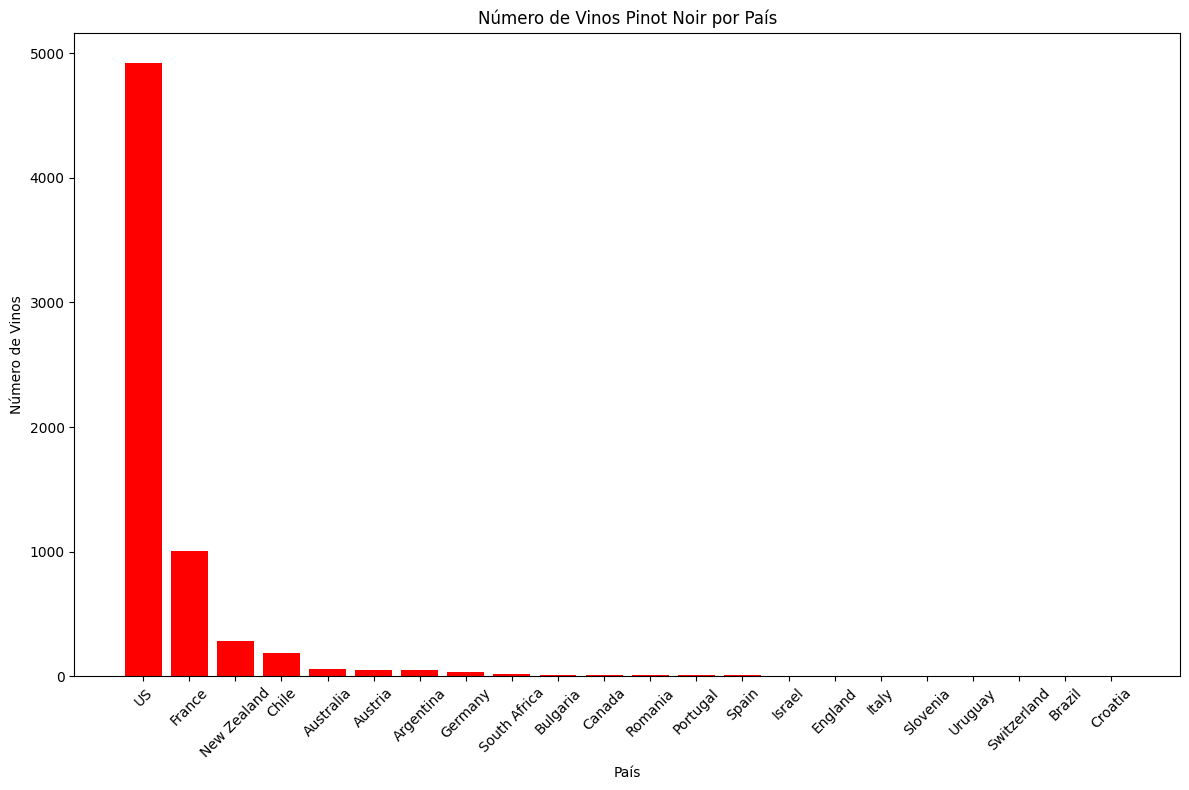

In [68]:
# ¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?

dfVariedadPais = dataFrame[dataFrame['variety'] == 'Pinot Noir'].groupby('country').count()['variety']
dfVariedadPais = dfVariedadPais.sort_values(ascending=False)

print(dfVariedadPais)


#Grafica
plt.figure(figsize=(12, 8))


plt.bar(dfVariedadPais.index, dfVariedadPais.values, color='red')

plt.title('Número de Vinos Pinot Noir por País')
plt.xlabel('País')
plt.ylabel('Número de Vinos')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()